In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras import layers
from keras import models
from keras.callbacks import TensorBoard
from keras.optimizers import SGD
from keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
def CNN(shape):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu',
                           input_shape=(shape[1],shape[2], shape[3])))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    model.summary()
    
    return model

<function matplotlib.pyplot.show(*args, **kw)>

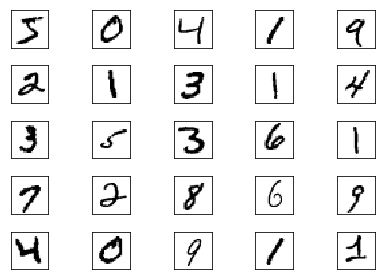

In [7]:
fig, ax = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True)
ax = ax.flatten()

for i in range(25):
    ax[i].imshow(X_train[i].reshape(28,28), cmap=plt.cm.gray_r)
    
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [4]:
model = CNN(X_train.shape)
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

W0628 01:09:38.256126 23120 deprecation_wrapper.py:119] From C:\Users\kosuke\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0628 01:09:38.300981 23120 deprecation_wrapper.py:119] From C:\Users\kosuke\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0628 01:09:38.316495 23120 deprecation_wrapper.py:119] From C:\Users\kosuke\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0628 01:09:38.347395 23120 deprecation_wrapper.py:119] From C:\Users\kosuke\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0628 01:09:38.455931 23120 deprecation_wrapper.py:119] From C:\Users\kosuk

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                36928     
__________

In [6]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), 
          epochs=5, batch_size=64,
          verbose=1, shuffle=True)

W0628 01:10:02.068421 23120 deprecation.py:323] From C:\Users\kosuke\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0628 01:10:02.170101 23120 deprecation_wrapper.py:119] From C:\Users\kosuke\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 43s 719us/step - loss: 0.1763 - acc: 0.9449 - val_loss: 0.0511 - val_acc: 0.9831
Epoch 2/5
60000/60000 [==============================] - 50s 833us/step - loss: 0.0481 - acc: 0.9852 - val_loss: 0.0283 - val_acc: 0.9908
Epoch 3/5
60000/60000 [==============================] - 45s 742us/step - loss: 0.0331 - acc: 0.9895 - val_loss: 0.0450 - val_acc: 0.9859
Epoch 4/5
60000/60000 [==============================] - 49s 813us/step - loss: 0.0251 - acc: 0.9920 - val_loss: 0.0279 - val_acc: 0.9915
Epoch 5/5
60000/60000 [==============================] - 47s 782us/step - loss: 0.0194 - acc: 0.9943 - val_loss: 0.0317 - val_acc: 0.9910
